In [37]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import ast

In [39]:
from datetime import datetime
import string

In [40]:
from sklearn.preprocessing import LabelEncoder

In [147]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab')

In [42]:
restaurants_df = pd.read_csv('output/responses/all_restaurants_dataset.csv')

In [43]:
restaurants_df.shape

(10104, 17)

In [44]:
restaurants = restaurants_df.copy()

In [45]:
reviews_df = pd.read_csv('output/responses/all_reviews_dataset.csv', low_memory=False)

In [46]:
reviews_df.shape

(4148074, 16)

In [47]:
reviews = reviews_df.copy()

# Data Cleaning

## Drop unnnecessary columns

In [48]:
restaurants = restaurants.drop(columns=['Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16'])

In [49]:
restaurants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10104 entries, 0 to 10103
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   place_id       10104 non-null  object 
 1   name           10104 non-null  object 
 2   reviews        10104 non-null  int64  
 3   main_category  10015 non-null  object 
 4   categories     10015 non-null  object 
 5   main_rating    10104 non-null  float64
 6   address        9992 non-null   object 
 7   link           10104 non-null  object 
 8   review_photos  10104 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 710.6+ KB


In [50]:
restaurants.shape

(10104, 9)

## Check NaN values and drop

In [51]:
restaurants.isnull().sum()

place_id           0
name               0
reviews            0
main_category     89
categories        89
main_rating        0
address          112
link               0
review_photos      0
dtype: int64

In [52]:
pd.set_option('display.max_rows', 20)

In [53]:
restaurants[restaurants['main_category'].isnull()]

,place_id,name,reviews,main_category,categories,main_rating,address,link,review_photos
629,ChIJ-5iwVQsZ2jERDYQr5iyYDbI,Jia Sen Enterprise Pte Ltd,0,NaN,NaN,0.0,"3 Upper Pickering St, Singapore 058289",https://www.google.com/maps/place/Jia+Sen+Ente...,[]
630,ChIJR-uLmRIZ2jERB3x-oYjX6-8,Madar Maidin S/o Sen Mohd,0,NaN,NaN,0.0,"7 Maxwell Rd, Singapore 069111",https://www.google.com/maps/place/Madar+Maidin...,[]
646,ChIJu63tBLEZ2jER4BWy9m52vtI,Wei Fu Sen Trading,0,NaN,NaN,0.0,"23 Baghdad St, Singapore 199662",https://www.google.com/maps/place/Wei+Fu+Sen+T...,[]
650,ChIJl0y967gZ2jER61Sh6YJd_Yg,SEN PA GA Property,0,NaN,NaN,0.0,"Upper Dickson Rd, Singapore 207474",https://www.google.com/maps/place/SEN+PA+GA+Pr...,[]
653,ChIJE3D9Nysa2jERVnXUtHpekrE,Hoong Yong Sen Dr,0,NaN,NaN,0.0,"18 Jln Membina, Singapore 164018",https://www.google.com/maps/place/Hoong+Yong+S...,[]
...,...,...,...,...,...,...,...,...,...
9403,ChIJo5fvvQwZ2jERz_JUcD4fzkg,The Fortuna Growth Fund,0,NaN,NaN,0.0,Cross St,https://www.google.com/maps/place/The+Fortuna+...,[]
9406,ChIJAQCQ7BEa2jERtZBv8sMBJpk,Fortuna Hu Mover,0,NaN,NaN,0.0,"8 Empress Rd, Singapore 260008",https://www.google.com/maps/place/Fortuna+Hu+M...,[]
9412,ChIJ__-vj-8Z2jERhye3e6pRpaM,Fotia Pte. Ltd.,0,NaN,NaN,0.0,"271 Bukit Timah Rd, Singapore 259708",https://www.google.com/maps/place/Fotia+Pte.+L...,[]
9415,ChIJfaAGgMgZ2jERwVcV4SINwwg,The Four Sg,0,NaN,NaN,0.0,"18 Verdun Rd, Singapore 207280",https://www.google.com/maps/place/The+Four+Sg/...,[]


In [54]:
restaurants = restaurants.dropna()

In [55]:
restaurants.isnull().sum()

place_id         0
name             0
reviews          0
main_category    0
categories       0
main_rating      0
address          0
link             0
review_photos    0
dtype: int64

In [56]:
restaurants.shape

(9907, 9)

## Drop any duplicates

In [57]:
pd.set_option('display.max_rows', 10)

In [58]:
restaurants[restaurants.duplicated(keep=False)]

,place_id,name,reviews,main_category,categories,main_rating,address,link,review_photos
33,ChIJ2-_9UgkZ2jERvURnZnvB8DM,旺爐 City Hot Pot @ One Raffles Place With Home ...,1398,Hot pot restaurant,"['Hot pot restaurant', 'Chinese restaurant', '...",4.6,"1 Raffles Pl, #04 - 26/27/28, Singapore 048616",https://www.google.com/maps/place/%E6%97%BA%E7...,['https://lh5.googleusercontent.com/p/AF1QipOw...
34,ChIJE2uZg3QZ2jERdDGp6DUaDdY,Ri Ri Hong Mala Xiang Guo,1546,Hawker Stall,['Hawker Stall'],4.0,"32 New Market Rd, #01-1036, Singapore 050032",https://www.google.com/maps/place/Ri+Ri+Hong+M...,['https://lh5.googleusercontent.com/p/AF1QipMR...
35,ChIJS2ibgn4X2jERBcHMaIRdBiw,Ri Ri Hong Mala Xiang Guo,33,Hawker Stall,['Hawker Stall'],3.7,"159A Hougang St 11, #01-02, Singapore 531159",https://www.google.com/maps/place/Ri+Ri+Hong+M...,['https://lh5.googleusercontent.com/p/AF1QipOL...
69,ChIJ13Gh1ioZ2jERmISnh_E9NNI,Roemah Makan,109,Indonesian restaurant,['Indonesian restaurant'],4.7,"531 Upper Cross St, #02-55 Hong Lim Complex, S...",https://www.google.com/maps/place/Roemah+Makan...,['https://lh5.googleusercontent.com/p/AF1QipNO...
77,ChIJEUU30zwP2jERK0y8vp6jboA,Rong Xing Hakka Yong Tau Fu,4,Hawker Stall,['Hawker Stall'],2.8,"3 Yung Sheng Rd, #03-120, Singapore 618499",https://www.google.com/maps/place/Rong+Xing+Ha...,['https://lh5.googleusercontent.com/p/AF1QipPG...
...,...,...,...,...,...,...,...,...,...
10098,ChIJ6-YzAysX2jERKmeXREbO7VM,Hualong Fishhead Steamboat,8,Chinese restaurant,['Chinese restaurant'],2.6,"Blk 631 Hougang Ave 8, #01-06, Singapore 530631",https://www.google.com/maps/place/Hualong+Fish...,['https://lh5.googleusercontent.com/p/AF1QipOW...
10099,ChIJ0T6YJPkZ2jER4SLNFf4Zthg,炭香 Charcoal Fish Head Steamboat Kallang,490,Chinese restaurant,['Chinese restaurant'],4.1,"5 Kallang Pl, Singapore 339152",https://www.google.com/maps/place/%E7%82%AD%E9...,['https://lh5.googleusercontent.com/p/AF1QipM_...
10100,ChIJ6Y9kApkb2jERVPmthHd725A,Hualong Fishhead Steamboat,3,Coffee shop,['Coffee shop'],4.3,40 Margaret Dr,https://www.google.com/maps/place/Hualong+Fish...,['https://lh5.googleusercontent.com/p/AF1QipNh...
10101,ChIJT49EoY0R2jERS0Ll4u0WxzU,HuaLong Fishhead Steamboat,45,Steamboat restaurant,"['Steamboat restaurant', 'Cafe', 'Coffee shop']",3.7,"155 Bukit Batok Street 11, #01-324, Singapore ...",https://www.google.com/maps/place/HuaLong+Fish...,['https://lh5.googleusercontent.com/p/AF1QipPQ...


In [59]:
restaurants.drop_duplicates(inplace=True)

In [60]:
restaurants.shape

(7816, 9)

In [61]:
restaurants[restaurants.duplicated(subset=['place_id', 'name', 'reviews', 'address'])]

,place_id,name,reviews,main_category,categories,main_rating,address,link,review_photos
11,ChIJd30Ooj4Z2jERnRDo8yBJBFs,Rempapa,551,Singaporean restaurant,['Singaporean restaurant'],4.2,"2 Paya Lebar Rd, #01-01/02/03 Park Place Resid...",https://www.google.com/maps/place/Rempapa/@1.3...,['https://lh5.googleusercontent.com/p/AF1QipPd...
79,ChIJL1wPThMZ2jER2SYqNpkbQ4w,Rong Xing Yong Tau Fu,51,Hawker Stall,['Hawker Stall'],3.6,"6 Tanjong Pagar Plz, #02-04, Singapore 081006",https://www.google.com/maps/place/Rong+Xing+Yo...,['https://lh5.googleusercontent.com/p/AF1QipO-...
97,ChIJ2aTh2yQX2jER-0StTda7ElM,Ru Lai Vegetarian food (Sin Ming Road),169,Hawker Stall,['Hawker Stall'],4.4,"24 Sin Ming Rd, #01-51, Singapore 571024",https://www.google.com/maps/place/Ru+Lai+Veget...,['https://lh5.googleusercontent.com/p/AF1QipPQ...
109,ChIJO_jq1K4Z2jERpTElH-AkV-0,SBCD Korean Tofu House (Millenia Walk),954,Korean restaurant,"['Korean restaurant', 'Restaurant']",4.0,"9 Raffles Boulevard, #01-114, Millenia Walk, S...",https://www.google.com/maps/place/SBCD+Korean+...,['https://lh5.googleusercontent.com/p/AF1QipOX...
110,ChIJ47Gk2dUb2jERwfnSotHkY-o,SBCD Korean Tofu House - Alexandra Retail Centre,273,Korean restaurant,['Korean restaurant'],4.0,"460 Alexandra Rd, #02-21 Alexandra Retail Cent...",https://www.google.com/maps/place/SBCD+Korean+...,['https://lh5.googleusercontent.com/p/AF1QipNJ...
...,...,...,...,...,...,...,...,...,...
10082,ChIJOe75OhQZ2jERg1rJsn5jEoA,House of Malaysia,38,Malaysian restaurant,['Malaysian restaurant'],3.6,"200 Jln Sultan, #01-25 Textile Centre, Singapo...",https://www.google.com/maps/place/House+of+Mal...,['https://lh5.googleusercontent.com/p/AF1QipPP...
10083,ChIJJR9auHAZ2jER8enAJuyfCyQ,House of Peranakan Petit,317,Nyonya restaurant,"['Nyonya restaurant', 'Asian restaurant', 'Res...",4.2,"42 Eng Hoon St, Estate 169785",https://www.google.com/maps/place/House+of+Per...,['https://lh5.googleusercontent.com/p/AF1QipNE...
10085,ChIJdwjQ2tQZ2jERFYU-5f1aW2g,Hoàng Hâu - Vietnamese Restaurant,239,Vietnamese restaurant,['Vietnamese restaurant'],4.6,"146 01, 1090 Jalan Bukit Merah, Block 146, 160146",https://www.google.com/maps/place/Ho%C3%A0ng+H...,['https://lh5.googleusercontent.com/p/AF1QipMC...
10088,ChIJxVQqvIwZ2jER4WhnK5h7S0g,Hua Ting Restaurant,721,Cantonese restaurant,"['Cantonese restaurant', 'Dim sum restaurant']",4.1,"Orchard Hotel Singapore, Level 2, 442 Orchard ...",https://www.google.com/maps/place/Hua+Ting+Res...,['https://lh5.googleusercontent.com/p/AF1QipOQ...


In [62]:
restaurants = restaurants.drop_duplicates(subset=['place_id', 'name', 'reviews', 'address'])

In [63]:
restaurants.shape

(6841, 9)

## Remove non-dining establishments

In [64]:
main_categories = list(restaurants['main_category'])
main_categories = list(set(main_categories))
main_categories.sort()

In [65]:
main_categories

['ATM',
 'Accountant',
 'Acupuncture clinic',
 'Advertising agency',
 'African restaurant',
 'After school program',
 'Air conditioning store',
 'Alcoholic beverage wholesaler',
 'American restaurant',
 'Andhra restaurant',
 'Anglican church',
 'Antique store',
 'Apartment building',
 'Apartment complex',
 'Arab restaurant',
 'Argentinian restaurant',
 'Art cafe',
 'Art center',
 'Art gallery',
 'Art museum',
 'Art studio',
 'Artistic handicrafts',
 'Asian fusion restaurant',
 'Asian restaurant',
 'Association / Organization',
 'Athletic field',
 'Auditor',
 'Australian restaurant',
 'Authentic Japanese restaurant',
 'Ayam penyet restaurant',
 'Açaí shop',
 'Baby store',
 'Bakery',
 'Bakso restaurant',
 'Ballet school',
 'Bank',
 'Bar',
 'Bar & grill',
 'Barbecue restaurant',
 'Barber shop',
 'Bazar',
 'Beauty product supplier',
 'Beauty salon',
 'Bed & breakfast',
 'Beer garden',
 'Bicycle club',
 'Bistro',
 'Book store',
 'Boutique',
 'Branding agency',
 'Brazilian restaurant',
 'Bre

In [66]:
len(main_categories)

490

In [67]:
cats_to_remove = ['ATM',
 'Accountant',
 'Acupuncture clinic',
 'Advertising agency',
 'Air conditioning store',
 'Anglican church',
 'Antique store',
 'Apartment building',
 'Apartment complex',
 'Art center',
 'Art gallery',
 'Art museum',
 'Art studio',
 'Artist',
 'Artistic handicrafts',
 'Association / Organization',
 'Athletic field',
 'Auditor',
 'Açaí shop',
 'Baby store',
 'Bakery',
 'Ballet school',
 'Bank',
 'Barber shop',
 'Beauty product supplier',
 'Beauty salon',
 'Bed & breakfast',
 'Bicycle club',
 'Boutique',
 'Branding agency',
 'Bridal shop',
 'Bus Interchange',
 'Bus depot',
 'Bus stop',
 'Business center',
 'Business management consultant',
 'Butcher shop',
 'Candle store',
 'Car dealer',
 'Car wash',
 'Caterer',
 'Catering food and drink supplier',
 'Catholic church',
 'Cement manufacturer',
 'Charity',
 'Chartered accountant',
 "Children's clothing store",
 'Chinese Takeaway',
 'Chinese language school',
 'Chocolate artisan',
 'Chocolate shop',
 'Clothing store',
 'Club',
 'Coaching center',
 'Coffee shop',
 'Coffee store',
 'Coffee wholesaler',
 'Commercial cleaning service',
 'Computer security service',
 'Computer store',
 'Computer support and services',
 'Condominium complex',
 'Confectionery store',
 'Consultant',
 'Contractor',
 'Convenience store',
 'Corporate gift supplier',
 'Corporate office',
 'Cosmetics and perfumes supplier',
 'Counselor',
 'Coworking space',
 'Cultural association',
 'Curtain and upholstery cleaning service',
 'Dance school',
 'Dance store',
 'Day care center',
 'Day spa',
 'Delivery Restaurant',
 'Department store',
 'Design agency',
 'Designer Clothing Shop',
 'Diving center',
 'Dog cafe',
 'E-commerce service',
 'Education center',
 'Educational institution',
 'Electroplating Service',
 'Employment agency',
 'Employment center',
 'Employment consultant',
 'Engineer',
 'Event management company',
 'Event planner',
 'Event venue',
 'Family service center',
 'Farm shop',
 'Fashion accessories store',
 'Fast food restaurant',
 'Finance broker',
 'Financial institution',
 'Financial planner',
 'Fish store',
 'Florist',
 'Flower delivery',
 'Food and drink',
 'Food court',
 'Food manufacturer',
 'Food manufacturing supply',
 'Food producer',
 'Food products supplier',
 'Freight forwarding service',
 'Frozen food store',
 'Fruit and vegetable wholesaler',
 'Fruit wholesaler',
 'Furniture store',
 'Garden center',
 'Gemologist',
 'Gift shop',
 'Gold dealer',
 'Goldsmith',
 'Gourmet grocery store',
 'Government office',
 'Grocery store',
 'Gym and Fitness Centre',
 'HDB Flats',
 'Hair salon',
 'Hardware store',
 'Haute French restaurant',
 'Hawker Stall',
 'Hawker center',
 'Health and beauty shop',
 'Health food store',
 'Hematologist',
 'Heritage building',
 'Hiking area',
 'Holding company',
 'Hotel',
 'House cleaning service',
 'Housing development',
 'Ice cream shop',
 'Ice supplier',
 'Importer',
 'Importer and Exporter',
 'Indian grocery store',
 'Indoor golf course',
 'Industrial Real Estate Agency',
 'Industrial equipment supplier',
 'Industry',
 'Information services',
 'Insurance',
 'Insurance company',
 'Interior designer',
 'Internet marketing service',
 'Italian grocery store',
 'Japanese confectionery shop',
 'Japanese grocery store',
 'Jeweler',
 'Jewelry store',
 'Karaoke bar',
 'Kiosk',
 'Kitchen',
 'Kitchen supply store',
 'Laboratory equipment supplier',
 'Language school',
 'Law firm',
 'Lawyer',
 'Learning center',
 'Legal services',
 'Lighting store',
 'Live music venue',
 'Local government office',
 'Lodging',
 'Lottery retailer',
 'Lounge',
 'Luggage store',
 'MRT/LRT Station',
 'Manufacturer',
 'Market',
 'Marketing agency',
 'Marketing consultant',
 'Martial arts club',
 'Massage spa',
 'Maternity store',
 'Mattress store',
 'Media company',
 'Medical Center',
 'Medical clinic',
 'Medical equipment supplier',
 'Memorial park',
 'Mining company',
 'Monument maker',
 'Motorcycle rental agency',
 'Movie rental store',
 'Moving and storage service',
 'Muay Thai boxing gym',
 'Music producer',
 'Music school',
 'Nail salon',
 'National forest',
 'Non-governmental organization',
 'Non-profit organization',
 'Occupational therapist',
 'Optician',
 'Organic food store',
 'Otolaryngologist',
 'Park',
 'Parking lot',
 'Pastry shop',
 'Performing arts group',
 'Performing arts theater',
 'Personal trainer',
 'Pest control service',
 'Pet Shop',
 'Photographer',
 'Photography service',
 'Plant nursery',
 'Plastic products supplier',
 'Playground',
 'Police station',
 'Preschool',
 'Print shop',
 'Property Investment',
 'Property management company',
 'Public parking space',
 'Publisher',
 'Real estate agency',
 'Real estate agent',
 'Real estate consultant',
 'Recording studio',
 'Religious destination',
 'Religious organization',
 'Restaurant supply store',
 'Rice restaurant',
 'Salad shop',
 'Sandwich shop',
 'School',
 'Seafood wholesaler',
 'Self service restaurant',
 'Serviced accommodation',
 'Shipping and mailing service',
 'Shipping service',
 'Shoe Shop',
 'Shoe repair shop',
 'Shop',
 'Shopping mall',
 'Social club',
 'Souvenir store',
 'Stationery store',
 'Supermarket',
 'Tattoo and piercing shop',
 'Tattoo shop',
 'Tea and coffee shop',
 'Tea store',
 'Tourist attraction',
 'Toy store',
 'Transportation service',
 'Travel agency',
 'Tutoring service',
 'Unknown',
 'Used clothing store',
 'Video production service',
 'Walk-in clinic',
 'Warehouse',
 'Waxing hair removal service',
 'Website designer',
 'Wedding photographer',
 'Wedding planner',
 'Wedding store',
 'Wedding venue',
 'Wellness center',
 'Wellness program',
 'Wholesaler',
 'Wine cellar',
 "Women's clothing store",
 'Yoga studio']

In [68]:
non_dining_categories = [
    'ATM',
    'Accountant',
    'Acupuncture clinic',
    'Advertising agency',
    'After school program',
    'Air conditioning store',
    'Alcoholic beverage wholesaler',
    'Anglican church',
    'Antique store',
    'Apartment building',
    'Apartment complex',
    'Art center',
    'Art gallery',
    'Art museum',
    'Art studio',
    'Artistic handicrafts',
    'Association / Organization',
    'Athletic field',
    'Auditor',
    'Baby store',
    'Ballet school',
    'Bank',
    'Barber shop',
    'Bazar',
    'Beauty product supplier',
    'Beauty salon',
    'Bed & breakfast',
    'Bicycle club',
    'Book store',
    'Boutique',
    'Branding agency',
    'Bridal shop',
    'Bus Interchange',
    'Bus depot',
    'Business center',
    'Business management consultant',
    'Business to business service',
    'Butcher shop',
    'Camera store',
    'Camping Ground',
    'Candle store',
    'Car dealer',
    'Car wash',
    'Catholic church',
    'Cement manufacturer',
    'Charity',
    'Chartered accountant',
    "Children's clothing store",
    'Chinese language school',
    'Chocolate artisan',
    'Cinema',
    'Clothing store',
    'Club',
    'Commercial cleaning service',
    'Commercial real estate inspector',
    'Community garden',
    'Computer security service',
    'Computer store',
    'Computer support and services',
    'Condominium complex',
    'Confectionery store',
    'Construction company',
    'Consultant',
    'Contractor',
    'Convenience store',
    'Corporate gift supplier',
    'Corporate office',
    'Cosmetics and perfumes supplier',
    'Counselor',
    'Coworking space',
    'Credit counseling service',
    'Cultural association',
    'Curtain and upholstery cleaning service',
    'Dance school',
    'Dance store',
    'Day care center',
    'Day spa',
    'Dental clinic',
    'Department store',
    'Design agency',
    'Designer Clothing Shop',
    'Diving center',
    'E-commerce service',
    'Education center',
    'Educational institution',
    'Educational testing service',
    'Electronics manufacturer',
    'Electroplating Service',
    'Employment agency',
    'Employment center',
    'Employment consultant',
    'Engineer',
    'Event management company',
    'Event planner',
    'Event venue',
    'Family service center',
    'Farm shop',
    'Fashion accessories store',
    'Finance broker',
    'Financial consultant',
    'Financial institution',
    'Financial planner',
    'Fish store',
    'Florist',
    'Flower delivery',
    'Food and drink',
    'Food manufacturer',
    'Food manufacturing supply',
    'Food producer',
    'Food products supplier',
    'Freight forwarding service',
    'Fruit and vegetable wholesaler',
    'Fruit wholesaler',
    'Garden',
    'Garden center',
    'Gemologist',
    'General practitioner',
    'Gift shop',
    'Gold dealer',
    'Goldsmith',
    'Gourmet grocery store',
    'Government office',
    'Grocery store',
    'Gym and Fitness Centre',
    'HDB Flats',
    'Hair salon',
    'Hairdresser',
    'Hardware store',
    'Health and beauty shop',
    'Health food store',
    'Health spa',
    'Hematologist',
    'Heritage building',
    'Hiking area',
    'Holding company',
    'Homewares Store',
    'Hostel',
    'Hotel',
    'House cleaning service',
    'Housing development',
    'Ice supplier',
    'Importer',
    'Importer and Exporter',
    'Indian grocery store',
    'Indoor golf course',
    'Indoor playground',
    'Industrial equipment supplier',
    'Industry',
    'Information services',
    'Insurance',
    'Insurance company',
    'Interior designer',
    'Internet marketing service',
    'Italian grocery store',
    'Jeweler',
    'Jewelry store',
    'Karaoke bar',
    'Kiosk',
    'Kitchen',
    'Kitchen supply store',
    'Laboratory equipment supplier',
    'Language school',
    'Law firm',
    'Lawyer',
    'Learning center',
    'Legal services',
    'Lighting store',
    'Live music venue',
    'Local government office',
    'Lodging',
    'Lottery retailer',
    'Lounge',
    'Luggage store',
    'MRT/LRT Station',
    'Makerspace',
    'Manufacturer',
    'Market',
    'Marketing agency',
    'Marketing consultant',
    'Martial arts club',
    'Massage spa',
    'Maternity store',
    'Mattress store',
    'Media company',
    'Medical Center',
    'Medical clinic',
    'Medical equipment supplier',
    'Memorial estate',
    'Memorial park',
    'Mining company',
    'Monument maker',
    'Motorcycle rental agency',
    'Movie rental store',
    'Moving and storage service',
    'Muay Thai boxing gym',
    'Museum',
    'Music management and promotion',
    'Music producer',
    'Music school',
    'Nail salon',
    'National forest',
    'Non-governmental organization',
    'Non-profit organization',
    'Occupational therapist',
    'Optician',
    'Optometrist',
    'Oral surgeon',
    'Organic food store',
    'Otolaryngologist',
    'Park',
    'Parking lot',
    'Personal trainer',
    'Pest control service',
    'Pet Shop',
    'Pharmacy',
    'Photographer',
    'Photography',
    'Plant nursery',
    'Plastic products supplier',
    'Playground',
    'Police station',
    'Preschool',
    'Print shop',
    'Property Investment',
    'Property management company',
    'Public parking space',
    'Publisher',
    'Real estate agency',
    'Real estate agent',
    'Real estate consultant',
    'Recording studio',
    'Recruiter',
    'Religious destination',
    'Religious organization',
    'Restaurant supply store',
    'Scenic spot',
    'School',
    'Seafood wholesaler',
    'Self service restaurant',
    'Serviced accommodation',
    'Shipping and mailing service',
    'Shipping service',
    'Shoe Shop',
    'Shoe repair shop',
    'Shop',
    'Shopping mall',
    'Social club',
    'Software company',
    'Soup kitchen',
    'Souvenir store',
    'Sports bar',
    'Stationery store',
    'Supermarket',
    'Swimming school',
    'Tailor',
    'Taoist temple',
    'Tattoo and piercing shop',
    'Tattoo shop',
    'Tea store',
    'Tourist attraction',
    'Toy store',
    'Trading company',
    'Transportation service',
    'Travel agency',
    'Tutoring service',
    'Used clothing store',
    'Video production service',
    'Walk-in clinic',
    'Warehouse',
    'Waxing hair removal service',
    'Website designer',
    'Wedding photographer',
    'Wedding planner',
    'Wedding store',
    'Wedding venue',
    'Wellness center',
    'Wholesale bakery',
    'Wholesale food store',
    'Wholesaler',
    'Wine cellar',
    "Women's clothing store",
    'Yoga studio',
    'Youth Centre',
    'Açaí shop',
 'Bakery',
'Caterer',
 'Catering food and drink supplier',
 'Chinese Takeaway',
 'Chocolate shop',
'Coffee shop',
 'Coffee store',
 'Coffee wholesaler',
 'Delivery Restaurant',
 'Dog cafe',
 'Fast food restaurant',
 'Food court',
 'Frozen food store',
 'Furniture store',
 'Haute French restaurant',
 'Hawker Stall',
 'Hawker center',
 'Ice cream shop',
 'Industrial Real Estate Agency',
 'Japanese confectionery shop',
 'Japanese grocery store',
 'Pastry shop',
 'Performing arts group',
 'Performing arts theater',
 'Photography service',
 'Rice restaurant',
 'Salad shop',
 'Sandwich shop',
 'Tea and coffee shop',
 'Wellness program'
]

In [69]:
len(non_dining_categories)

314

In [70]:
set(main_categories) - set(non_dining_categories)

{'African restaurant',
 'American restaurant',
 'Andhra restaurant',
 'Arab restaurant',
 'Argentinian restaurant',
 'Art cafe',
 'Asian fusion restaurant',
 'Asian restaurant',
 'Australian restaurant',
 'Authentic Japanese restaurant',
 'Ayam penyet restaurant',
 'Bakso restaurant',
 'Bar',
 'Bar & grill',
 'Barbecue restaurant',
 'Beer garden',
 'Bistro',
 'Brazilian restaurant',
 'Breakfast restaurant',
 'Brunch restaurant',
 'Bubble tea store',
 'Buffet restaurant',
 'Burmese restaurant',
 'Butcher shop deli',
 'Cafe',
 'Cafeteria',
 'Cake shop',
 'Cantonese restaurant',
 'Cat cafe',
 'Catalonian restaurant',
 'Cha chaan teng (Hong Kong-style cafe)',
 'Chettinad restaurant',
 'Chicken restaurant',
 'Chicken wings restaurant',
 'Chinese bakery',
 'Chinese noodle restaurant',
 'Chinese restaurant',
 'Chinese tea house',
 'Chocolate cafe',
 'Cocktail bar',
 'Coffee roasters',
 'Coffee stand',
 'Conveyor belt sushi restaurant',
 'Country food restaurant',
 'Creperie',
 'Deli',
 'Deliv

In [71]:
set(cats_to_remove ) - set(non_dining_categories)

{'Artist', 'Bus stop', 'Coaching center', 'Unknown'}

In [73]:
non_dining_categories = [cat.lower() for cat in non_dining_categories]
mask = restaurants['main_category'].str.lower().isin(non_dining_categories)
restaurants = restaurants[~mask]
restaurants.shape

(4916, 9)

In [159]:
restaurants['main_category'].value_counts()

Restaurant                     973
Cafe                           382
Chinese restaurant             380
Indian restaurant              201
Japanese restaurant            192
                              ... 
Russian restaurant               1
African restaurant               1
Eastern European restaurant      1
Bakso restaurant                 1
Yemeni restaurant                1
Name: main_category, Length: 180, dtype: int64

# Establish Consideration Set

## Set Minimum Rating and Reviews

In [74]:
restaurants_set = restaurants[(restaurants['main_rating'] >= 3.5) & (restaurants['reviews'] >= 10)].copy()
restaurants_set.shape

(4147, 9)

## Fill In Actual Category for Significant Restaurants Which Only Have 'Restaurant' as Main Category

In [75]:
num_restaurants_by_categories = restaurants_set['main_category'].value_counts()
num_restaurants_by_categories

Restaurant                     745
Cafe                           350
Chinese restaurant             317
Indian restaurant              189
Japanese restaurant            176
                              ... 
Oyster bar restaurant            1
Cat cafe                         1
Eastern European restaurant      1
Kushiyaki restaurant             1
Yemeni restaurant                1
Name: main_category, Length: 167, dtype: int64

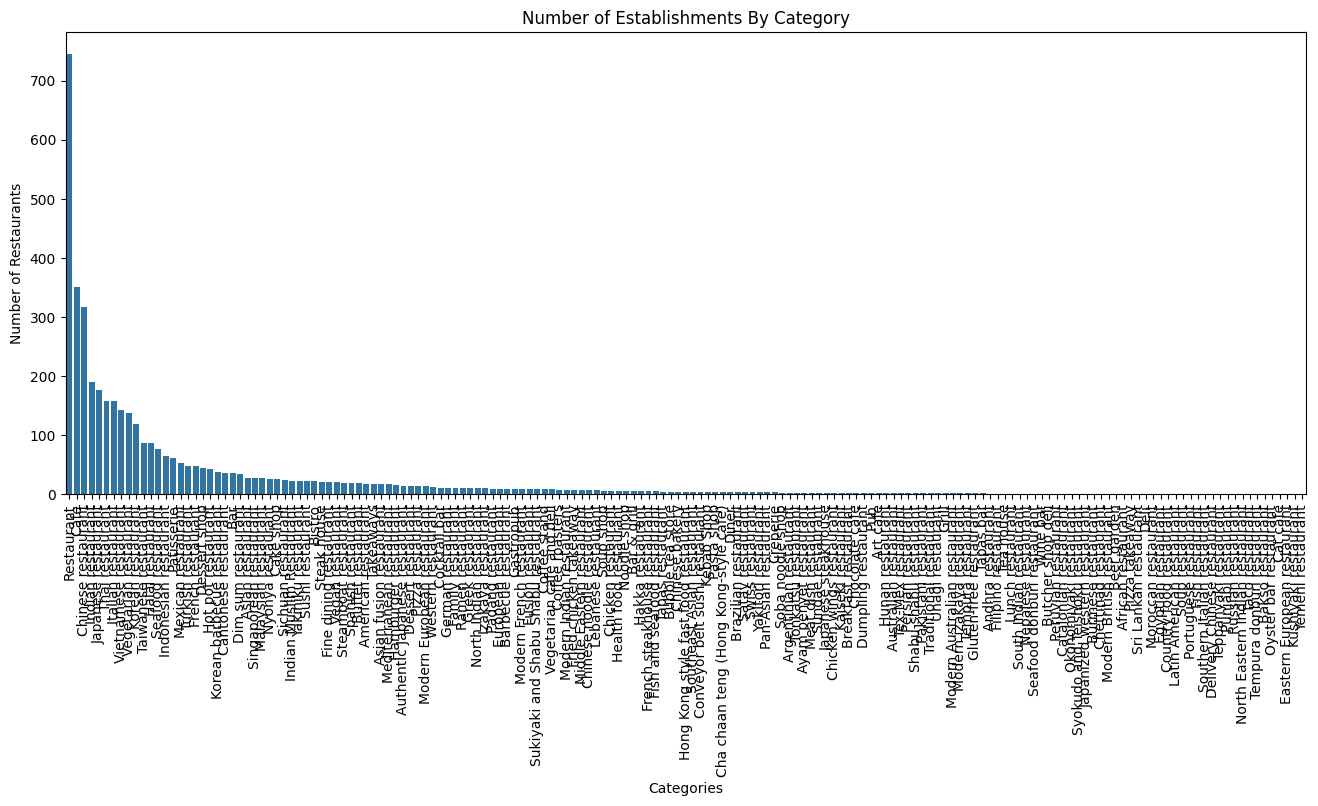

In [76]:
plt.figure(figsize=(16,6)) 
sns.countplot(data=restaurants_set, x='main_category', order=num_restaurants_by_categories.index)
plt.xticks(rotation=90)
plt.title('Number of Establishments By Category')
plt.xlabel('Categories')
plt.ylabel('Number of Restaurants')
plt.show()

### Drop some weird places that were wrongly categorised as 'restaurants'

In [77]:
non_restaurants = ['Leila katheera', 'Dempsey Hill', 'Encik Tan', 'Tian Huat Rice Stall', 'Mr Teh Tarik Eating House', 'Shake Shack (Suntec)', 'Shake Shack 89 Neil Road', 'Shake Shack Great World']

In [78]:
restaurants_set[restaurants_set['name'].str.contains('Shake Shack')]

,place_id,name,reviews,main_category,categories,main_rating,address,link,review_photos
708,ChIJK8BF048Z2jERnVlPOhTONCw,Shake Shack (Suntec),1541,Hamburger restaurant,"['Hamburger restaurant', 'Western restaurant']",4.3,"3 Temasek Boulevard, #01-357, Suntec City, Mal...",https://www.google.com/maps/place/Shake+Shack+...,['https://lh5.googleusercontent.com/p/AF1QipMC...
710,ChIJm49xXYkZ2jERkPB4-N9Cd6E,Shake Shack 89 Neil Road,1867,Hamburger restaurant,"['Hamburger restaurant', 'Western restaurant']",4.3,"89 Neil Rd, #01-01, Singapore 088849",https://www.google.com/maps/place/Shake+Shack+...,['https://lh5.googleusercontent.com/p/AF1QipOU...
711,ChIJ3Wov6ewZ2jERurlnr1wclU8,Shake Shack Great World,482,Hamburger restaurant,"['Hamburger restaurant', 'Western restaurant']",4.1,"1 Kim Seng Promenade, #01-101, Singapore 237994",https://www.google.com/maps/place/Shake+Shack+...,['https://lh5.googleusercontent.com/p/AF1QipNv...


In [79]:
restaurants_set = restaurants_set[~restaurants_set['name'].isin(non_restaurants)]
restaurants_set.shape

(4138, 9)

### For restaurants with a secondary category within 'categories', set that as the main category

In [80]:
pd.set_option('display.max_rows', 30)

In [81]:
restaurants_set[restaurants_set['main_category'] == 'Restaurant']

,place_id,name,reviews,main_category,categories,main_rating,address,link,review_photos
15,ChIJ6eCqdV0Z2jERGTysrBvGX_M,Restaurant Chaleur,54,Restaurant,['Restaurant'],5.0,"77A Neil Rd, Level 2, Singapore 088903",https://www.google.com/maps/place/Restaurant+C...,['https://lh5.googleusercontent.com/p/AF1QipOV...
17,ChIJ99ae4CcZ2jERhNdU8AYgcsg,Restaurant Euphoria,159,Restaurant,"['Restaurant', 'Fine dining restaurant']",4.3,"76 Tras St, Singapore 079015",https://www.google.com/maps/place/Restaurant+E...,['https://lh5.googleusercontent.com/p/AF1QipM6...
20,ChIJ7-udqZQZ2jERYa5K9CfhBDk,Restaurant Imbue,42,Restaurant,['Restaurant'],4.7,"32 Keong Saik Rd., Singapore 089137",https://www.google.com/maps/place/Restaurant+I...,['https://lh5.googleusercontent.com/p/AF1QipNx...
21,ChIJm1zTNaEb2jERU32IIDHexmY,Restaurant Início,32,Restaurant,['Restaurant'],4.5,"2 Leng Kee Rd, #01-06, Singapore 159086",https://www.google.com/maps/place/Restaurant+I...,['https://lh5.googleusercontent.com/p/AF1QipOa...
22,ChIJKf8-B1IZ2jERKoqDakRkZy0,Restaurant JAG,312,Restaurant,"['Restaurant', 'European restaurant', 'Fine di...",4.8,"41 Robertson Quay, #02-02 STPI Creative Worksh...",https://www.google.com/maps/place/Restaurant+J...,['https://lh5.googleusercontent.com/p/AF1QipPm...
...,...,...,...,...,...,...,...,...,...
10048,ChIJy1BG-K8Z2jER7sm1rFx4_M4,Hong Hu Restaurant Steamboat Buffet,22,Restaurant,['Restaurant'],4.0,"12 Liang Seah St, Singapore 189033",https://www.google.com/maps/place/Hong+Hu+Rest...,['https://lh5.googleusercontent.com/p/AF1QipPg...
10068,ChIJXYrMYNA0K4gRwtEJIQ7lZ6s,Hooters Downtown Toronto,2103,Restaurant,"['Restaurant', 'American restaurant', 'Chicken...",3.6,"280 Adelaide St W, Toronto, ON M5V 1P6, Canada",https://www.google.com/maps/place/Hooters+Down...,['https://lh5.googleusercontent.com/p/AF1QipNG...
10073,ChIJQ6cPiSMZ2jERYP9lJruuJFA,Hopscotch (Gardens by the Bay),462,Restaurant,"['Restaurant', 'Cocktail bar']",4.5,"18 Marina Gardens Dr, #01-21 Bayfront Plaza (N...",https://www.google.com/maps/place/Hopscotch+(G...,['https://lh5.googleusercontent.com/p/AF1QipOR...
10081,ChIJvRlPUrwP2jERvGvJbVmKm9Q,House Of Kebabs,25,Restaurant,['Restaurant'],3.6,"762 Jurong West Street 75, Singapore 640762",https://www.google.com/maps/place/House+Of+Keb...,['https://lh5.googleusercontent.com/p/AF1QipOa...


In [82]:
restaurants_set['categories'] = restaurants_set['categories'].apply(lambda x: ast.literal_eval(x))

In [83]:
sec_cat_mask = (restaurants_set['main_category'] == 'Restaurant') & (restaurants_set['categories'].apply(lambda x: x != ['Restaurant']))
restaurants_set[sec_cat_mask]

,place_id,name,reviews,main_category,categories,main_rating,address,link,review_photos
17,ChIJ99ae4CcZ2jERhNdU8AYgcsg,Restaurant Euphoria,159,Restaurant,"[Restaurant, Fine dining restaurant]",4.3,"76 Tras St, Singapore 079015",https://www.google.com/maps/place/Restaurant+E...,['https://lh5.googleusercontent.com/p/AF1QipM6...
22,ChIJKf8-B1IZ2jERKoqDakRkZy0,Restaurant JAG,312,Restaurant,"[Restaurant, European restaurant, Fine dining ...",4.8,"41 Robertson Quay, #02-02 STPI Creative Worksh...",https://www.google.com/maps/place/Restaurant+J...,['https://lh5.googleusercontent.com/p/AF1QipPm...
24,ChIJOzm-ewsZ2jERw7ogKjE31no,Restaurant Matera,59,Restaurant,"[Restaurant, Wine bar]",4.5,"3 Fullerton Rd, #02-01/02/03 The Fullerton Wat...",https://www.google.com/maps/place/Restaurant+M...,['https://lh5.googleusercontent.com/p/AF1QipOV...
104,ChIJQZSF3KIZ2jERQA0GffcBSFw,SABAR Singapore,301,Restaurant,"[Restaurant, Japanese restaurant]",4.2,"100 Tras St, #03-14, Singapore 079027",https://www.google.com/maps/place/SABAR+Singap...,['https://lh5.googleusercontent.com/p/AF1QipNU...
155,ChIJO6xj9rsZ2jERpOBCqhjX3Cg,"Pano Kato Grill, Pizza & Deli",919,Restaurant,"[Restaurant, Diner, Doner kebab restaurant, Ta...",4.1,"163 Tanglin Rd, #02-142/144 Tanglin Mall, Sing...",https://www.google.com/maps/place/Pano+Kato+Gr...,['https://lh5.googleusercontent.com/p/AF1QipOs...
...,...,...,...,...,...,...,...,...,...
9865,ChIJ_anjs8wZ2jERX9UwtpK1JBQ,Happy Lamb Hot Pot 快乐小羊火锅 - Orchard,1662,Restaurant,"[Restaurant, Buffet restaurant, Chinese restau...",4.7,"9 Scotts Rd, #02-10 Pacific Plaza, Singapore 2...",https://www.google.com/maps/place/Happy+Lamb+H...,['https://lh5.googleusercontent.com/p/AF1QipN5...
9880,ChIJh6wGosEb2jERuTRX9vxr13c,Hathaway,461,Restaurant,"[Restaurant, Asian restaurant, South Asian res...",4.4,"Block 13 Dempsey Rd, #01-07, Singapore 249674",https://www.google.com/maps/place/Hathaway/@1....,['https://lh5.googleusercontent.com/p/AF1QipMk...
10068,ChIJXYrMYNA0K4gRwtEJIQ7lZ6s,Hooters Downtown Toronto,2103,Restaurant,"[Restaurant, American restaurant, Chicken wing...",3.6,"280 Adelaide St W, Toronto, ON M5V 1P6, Canada",https://www.google.com/maps/place/Hooters+Down...,['https://lh5.googleusercontent.com/p/AF1QipNG...
10073,ChIJQ6cPiSMZ2jERYP9lJruuJFA,Hopscotch (Gardens by the Bay),462,Restaurant,"[Restaurant, Cocktail bar]",4.5,"18 Marina Gardens Dr, #01-21 Bayfront Plaza (N...",https://www.google.com/maps/place/Hopscotch+(G...,['https://lh5.googleusercontent.com/p/AF1QipOR...


In [84]:
restaurants_set.loc[sec_cat_mask, 'main_category'] = restaurants_set['categories'].apply(
    lambda x: x[1] if len(x) > 1 else x[0]
)

### For the remaining restaurants with only 'Restaurant' category, we drop those that have rating less than 4 and reviews less than 300, then manually change the category for the remaining ones

In [85]:
pd.set_option('display.max_rows', 10)

In [86]:
restaurants_set[(restaurants_set['main_category'] == 'Restaurant')]

,place_id,name,reviews,main_category,categories,main_rating,address,link,review_photos
15,ChIJ6eCqdV0Z2jERGTysrBvGX_M,Restaurant Chaleur,54,Restaurant,[Restaurant],5.0,"77A Neil Rd, Level 2, Singapore 088903",https://www.google.com/maps/place/Restaurant+C...,['https://lh5.googleusercontent.com/p/AF1QipOV...
20,ChIJ7-udqZQZ2jERYa5K9CfhBDk,Restaurant Imbue,42,Restaurant,[Restaurant],4.7,"32 Keong Saik Rd., Singapore 089137",https://www.google.com/maps/place/Restaurant+I...,['https://lh5.googleusercontent.com/p/AF1QipNx...
21,ChIJm1zTNaEb2jERU32IIDHexmY,Restaurant Início,32,Restaurant,[Restaurant],4.5,"2 Leng Kee Rd, #01-06, Singapore 159086",https://www.google.com/maps/place/Restaurant+I...,['https://lh5.googleusercontent.com/p/AF1QipOa...
26,ChIJueAjEfEZ2jER63xqRZHiAKE,Restaurant Poise,114,Restaurant,[Restaurant],4.9,"6 Teck Lim Rd, Singapore 088384",https://www.google.com/maps/place/Restaurant+P...,['https://lh5.googleusercontent.com/p/AF1QipNg...
29,ChIJDxn4XBYZ2jERrbHE7aDSKGY,Revolver,298,Restaurant,[Restaurant],4.3,"56 Tras St, Singapore 078995",https://www.google.com/maps/place/Revolver/dat...,['https://lh5.googleusercontent.com/p/AF1QipMq...
...,...,...,...,...,...,...,...,...,...
9857,ChIJAax2xrsZ2jER4H6xmWu6Hkg,Hao Lai Wu Steamboat BBQ 好来屋火锅烧烤,333,Restaurant,[Restaurant],3.5,"#01-57 Burlington Square, 175 Bencoolen St, 18...",https://www.google.com/maps/place/Hao+Lai+Wu+S...,['https://lh5.googleusercontent.com/p/AF1QipPy...
9870,ChIJw37-fcA92jER4iVNGpkMefc,Hard Rock Cafe Changi Airport Singapore,26,Restaurant,[Restaurant],4.0,"60 Airport Boulevard Unit No 02-177, Terminal ...",https://www.google.com/maps/place/Hard+Rock+Ca...,['https://lh5.googleusercontent.com/p/AF1QipNM...
9994,ChIJoeBXbssb2jERsnEOvlPtBrQ,Hei Lun Shi Tang 黑轮食堂,101,Restaurant,[Restaurant],4.1,"1 Queensway, #02-47, Singapore 149053",https://www.google.com/maps/place/Hei+Lun+Shi+...,['https://lh5.googleusercontent.com/p/AF1QipPv...
10048,ChIJy1BG-K8Z2jER7sm1rFx4_M4,Hong Hu Restaurant Steamboat Buffet,22,Restaurant,[Restaurant],4.0,"12 Liang Seah St, Singapore 189033",https://www.google.com/maps/place/Hong+Hu+Rest...,['https://lh5.googleusercontent.com/p/AF1QipPg...


In [87]:
mask_to_drop = (restaurants_set['main_category'] == 'Restaurant') & ((restaurants_set['reviews']<300) | (restaurants_set['main_rating']<4.0))

In [88]:
restaurants_set.shape

(4138, 9)

In [89]:
restaurants_set = restaurants_set.loc[~mask_to_drop]

In [90]:
restaurants_set.shape

(3787, 9)

In [91]:
sorted(list(restaurants_set[(restaurants_set['main_category'] == 'Restaurant')]['name']))

['109 Yong Tau Foo',
 '15 Stamford',
 'Absurdities Singapore',
 'Abundance: Taiwanese Restaurant & Craft Beer Bar (Redhill)',
 'Ah Lock & Co',
 'Ah Lock & Co',
 "Ajumma's Northpoint",
 "Ajumma's Westgate",
 'Alice Boulangerie & Restaurant',
 'Alice Boulangerie & Restaurant',
 'Alijiang',
 'Anglo Indian Cafe & Bar',
 'Arab Street Turkish & Western Restaurant',
 'Arab Street Turkish & Western Restaurant',
 'Ashoka Tandoor Family Restaurant',
 'Bacos',
 'Bagus LaMian',
 'Bearded Bella',
 'Bugis BBQ and Hotpot',
 'Caffe Fernet',
 "Charlie's Restaurant & Bar (Boat Quay)",
 "Chef's Table by Chef Stephan (Western Omakase, Fine Dining)",
 "Chen's",
 'Cherki',
 'Cherry & Oak',
 'Chuan Kee Seafood',
 'Comida Mexicana Singapore',
 "D'Penyetz Jem",
 'DaXi 大喜 - VivoCity',
 'Dum Pukht Grill & Curry',
 'Eden Restaurant',
 'Estuary Seafood Restaurant Bar - Event Space Orchard Road',
 'Fairytail Bar - By The Halal Mixologist',
 'Feng Sheng Kampong Chicken Rice & Steamboat (24 Hours) | 豐盛滑鸡火锅',
 'Frieda

In [92]:
# Manual mapping using ChatGPT
restaurant_recategorisation = {
    '109 Yong Tau Foo': 'Chinese restaurant',
    '15 Stamford': 'International restaurant',
    'Absurdities Singapore': 'Experimental cuisine restaurant',
    'Abundance: Taiwanese Restaurant & Craft Beer Bar (Redhill)': 'Taiwanese restaurant',
    'Ah Lock & Co': 'Singaporean restaurant',
    'Ajumma\'s Northpoint': 'Korean restaurant',
    'Ajumma\'s Westgate': 'Korean restaurant',
    'Alice Boulangerie & Restaurant': 'French bakery and restaurant',
    'Alijiang': 'Chinese restaurant',
    'Anglo Indian Cafe & Bar': 'Indian restaurant',
    'Arab Street Turkish & Western Restaurant': 'Turkish restaurant',
    'Ashoka Tandoor Family Restaurant': 'Indian restaurant',
    'Bacos': 'Western restaurant',
    'Bagus LaMian': 'Chinese restaurant',
    'Bearded Bella': 'Cafe',
    'Bugis BBQ and Hotpot': 'Chinese BBQ and Hotpot restaurant',
    'Caffe Fernet': 'Italian restaurant',
    'Charlie\'s Restaurant & Bar (Boat Quay)': 'Western restaurant',
    'Chef\'s Table by Chef Stephan (Western Omakase, Fine Dining)': 'Fine dining restaurant',
    'Chen\'s': 'Chinese restaurant',
    'Cherki': 'Peranakan restaurant',
    'Cherry & Oak': 'Fusion restaurant',
    'Chuan Kee Seafood': 'Chinese seafood restaurant',
    'Comida Mexicana Singapore': 'Mexican restaurant',
    'D\'Penyetz Jem': 'Indonesian restaurant',
    'DaXi 大喜 - VivoCity': 'Chinese restaurant',
    'Dum Pukht Grill & Curry': 'Indian restaurant',
    'Eden Restaurant': 'International restaurant',
    'Estuary Seafood Restaurant Bar - Event Space Orchard Road': 'Seafood restaurant',
    'Fairytail Bar - By The Halal Mixologist': 'Bar',
    'Feng Sheng Kampong Chicken Rice & Steamboat (24 Hours) | 豐盛滑鸡火锅': 'Chinese restaurant',
    'Frieda Beer Garden & German Restaurant': 'German restaurant',
    'GLC Hao Yun Lai Restaurant (好运来餐厅）': 'Chinese restaurant',
    'Galangal': 'Thai restaurant',
    'Genius Central Singapore': 'Healthy dining restaurant',
    'Gold Ocean Curry Fish Head': 'Indian restaurant',
    'Good Luck BBQ 上上签四川小酒馆': 'Chinese BBQ restaurant',
    'Great Nanyang Heritage Cafe 大南洋': 'Singaporean restaurant',
    'Hahahotpot Jalan Pisang': 'Hotpot restaurant',
    'Hopscotch (Capitol)': 'Bar and restaurant',
    'Huda Restaurant SG 胡大饭店': 'Chinese restaurant',
    'Humpback': 'Seafood restaurant',
    'JAAN By Kirk Westaway': 'French fine dining restaurant',
    'Jason Niang Dou Fu': 'Chinese restaurant',
    'Jia Xiang Sarawak Kuching Kolo Mee': 'Malaysian restaurant',
    'Jiak Modern Tzechar @ Hillv2': 'Chinese restaurant',
    'Josh\'s Grill': 'Western restaurant',
    'Joséphine - French Cuisine & Wine Bar': 'French restaurant',
    'Korat Thai Cafe': 'Thai restaurant',
    'Kubo Wood-fired Cuisine & Wine Bar': 'Filipino restaurant',
    'La Mensa Multi Cuisine': 'International restaurant',
    'Lazy Lizard - Flora Vista': 'Western restaurant',
    'Lepak at Sultan': 'Cafe',
    'Lime Restaurant': 'International buffet restaurant',
    'Lolla': 'Mediterranean restaurant',
    'Làng Nướng 1980\'s - Authentic Vietnamese home-cooked Cuisine': 'Vietnamese restaurant',
    'Madame Fan': 'Chinese restaurant',
    'Makan@Jen': 'Buffet restaurant',
    'Man Man Japanese Unagi (Clarke Quay)': 'Japanese restaurant',
    'Meta Restaurant': 'Modern European restaurant',
    'Nyonyas & Gentlemen Restaurant': 'Peranakan restaurant',
    'ODETTE': 'French fine dining restaurant',
    'Odette': 'French fine dining restaurant',
    'Old Bibik\'s Peranakan Kitchen': 'Peranakan restaurant',
    'Olive Vine Pasta Fusion': 'Italian fusion restaurant',
    'Olivia Restaurant & Lounge': 'Spanish restaurant',
    'Oscar\'s': 'Buffet restaurant',
    'Overrice (Voted Best Halal Restaurant near Haji Lane)': 'Middle Eastern restaurant',
    'Papa Ayam 313@somerset': 'Indonesian restaurant',
    'Pastaria Abate': 'Italian restaurant',
    'Penang Culture': 'Malaysian restaurant',
    'Podi & Poriyal': 'Indian restaurant',
    'Putra Minang Restaurant Bencoolen': 'Indonesian restaurant',
    'Qi - House of Sichuan': 'Chinese restaurant',
    'RACINES': 'French and Chinese restaurant',
    'Ristorante Vista Duomo': 'Italian restaurant',
    'SKAI Restaurant': 'Grill restaurant',
    'San Laksa Steamboat Pte Ltd': 'Chinese restaurant',
    'San Shu Gong Private Dining 三叔公私房菜': 'Chinese restaurant',
    'Sanook Kitchen - City Square': 'Thai restaurant',
    'Selera Serambi by Tang Tea House': 'Malay restaurant',
    'Sibarita Habana': 'Spanish restaurant',
    'Sibarita Restaurante': 'Spanish restaurant',
    'Sinpopo Brand Restaurant @ TANGS': 'Singaporean restaurant',
    'Siri House Dempsey': 'Contemporary restaurant',
    'Sum Dim Sum (Bedok)': 'Chinese restaurant',
    'Sum Dim Sum (Punggol)': 'Chinese restaurant',
    'Summer Hill': 'French restaurant',
    'Synthesis 食拿酒稳: Modern Chinese Restaurant & Cocktail Bar (Suntec City)': 'Chinese restaurant',
    'TAP @ 9 Penang': 'Tapas restaurant',
    'Tapas,24 Singapore': 'Spanish restaurant',
    'The Beef House': 'Steakhouse',
    'The Curry Wok (TCW)': 'Indian restaurant',
    'The Dempsey Project': 'International restaurant',
    'The French Ladle': 'French restaurant',
    'The Guild': 'Bar and restaurant',
    'The Halia at Singapore Botanic Gardens': 'Modern European restaurant',
    'The Mask Restaurant and Bar': 'Western restaurant',
    'The Orchard Cafe': 'International buffet restaurant',
    'Thevar': 'Indian fusion restaurant',
    'Thien Long Vietnamese Food': 'Vietnamese restaurant',
    'Tian Tian You Yu 天天友魚': 'Chinese seafood restaurant',
    'Tiffin Room': 'Indian restaurant',
    'Tilly\'s by Butcher Boy': 'Western restaurant',
    'Ting Yuan Hotpot Buffet': 'Chinese hotpot restaurant',
    'Tash Tish Tosh @ 50K': 'Halal restaurant',
    'Town Restaurant': 'International buffet restaurant',
    'True Cost': 'International restaurant',
    'VENUE By Sebastian': 'Modern European restaurant',
    'VIETSEA® I - VUA LẨU': 'Vietnamese hotpot restaurant',
    'WAKUDA': 'Japanese restaurant',
    'WINESTONE': 'Western restaurant',
    'Waroeng Anak Indo': 'Indonesian restaurant',
    'Wild Coco (Hamilton Road)': 'Fusion restaurant',
    'Ya Ge - 雅阁 (Orchid Hotel SG)': 'Chinese restaurant',
    'Yang Guo Fu Mala Tang 杨国福麻辣烫 @ Northpoint City': 'Chinese restaurant',
    'YinJi Singapore': 'Chinese restaurant',
    'Yì By Jereme Leung': 'Chinese fine dining restaurant',
    'fennel by komala vilas': 'Indian restaurant',
    'ilmiri Korean Fusion Cuisine': 'Korean restaurant',
    '蜀都丰 SO DO FUN @ MIDTOWN HOUSE': 'Chinese restaurant',
    '辣不辣 Labula BBQ Sichuan Restaurant @ Hougang Village': 'Chinese BBQ restaurant'
}

In [93]:
restaurant_cat_mask = (restaurants_set['main_category'] == 'Restaurant')
restaurants_set[restaurant_cat_mask]

,place_id,name,reviews,main_category,categories,main_rating,address,link,review_photos
128,ChIJNVinX68Z2jERWFXDwnDd9ZA,SKAI Restaurant,793,Restaurant,[Restaurant],4.1,"2 Stamford Rd, Lvl 70 #70-01, Singapore 178882",https://www.google.com/maps/place/SKAI+Restaur...,['https://lh5.googleusercontent.com/p/AF1QipMn...
241,ChIJTyv2becb2jERS9AdZuepE3E,San Laksa Steamboat Pte Ltd,664,Restaurant,[Restaurant],4.5,"147 Kitchener Rd, Singapore 208524",https://www.google.com/maps/place/San+Laksa+St...,['https://lh5.googleusercontent.com/p/AF1QipNV...
243,ChIJk7S78QUZ2jER5nnqUH2WAbc,San Shu Gong Private Dining 三叔公私房菜,453,Restaurant,[Restaurant],4.3,"135 Geylang Rd, #01-01, Singapore 389226",https://www.google.com/maps/place/San+Shu+Gong...,['https://lh5.googleusercontent.com/p/AF1QipNo...
277,ChIJF6pp0m8T2jERbcoLV12Qdvg,Sanook Kitchen - City Square,442,Restaurant,[Restaurant],4.5,"Lot MB-11,12,13 & 14, Basement, City square, 1...",https://www.google.com/maps/place/Sanook+Kitch...,['https://lh5.googleusercontent.com/p/AF1QipPG...
472,ChIJS7oMDLwZ2jERZltLVUEQc8c,Lepak at Sultan,462,Restaurant,[Restaurant],4.1,"62 Bussorah St, Singapore 199478",https://www.google.com/maps/place/Lepak+at+Sul...,['https://lh5.googleusercontent.com/p/AF1QipNW...
...,...,...,...,...,...,...,...,...,...
9572,ChIJL1s64ccZ2jERWJa6Ep5wrdw,Great Nanyang Heritage Cafe 大南洋,584,Restaurant,[Restaurant],4.0,"5 Craig Rd, Singapore 089665",https://www.google.com/maps/place/Great+Nanyan...,['https://lh5.googleusercontent.com/p/AF1QipNq...
9672,ChIJO2X12pMZ2jEReWI_hpE8OHE,Hahahotpot Jalan Pisang,316,Restaurant,[Restaurant],4.8,"9 Jln Pisang, Singapore 199076",https://www.google.com/maps/place/Hahahotpot+J...,['https://lh5.googleusercontent.com/p/AF1QipNL...
9696,ChIJGXoEwloZ2jERIUSR4jA7ogQ,Ah Lock & Co,3877,Restaurant,[Restaurant],4.8,"7 Wallich St, #B2 - 22 / 23 / 24, Singapore 07...",https://www.google.com/maps/place/Ah+Lock+%26+...,['https://lh5.googleusercontent.com/p/AF1QipMU...
9739,ChIJDeZvQQoZ2jERC3BgwW3ln_0,109 Yong Tau Foo,415,Restaurant,[Restaurant],4.4,"90 Circular Rd, Singapore 049441",https://www.google.com/maps/place/109+Yong+Tau...,['https://lh5.googleusercontent.com/p/AF1QipPw...


In [94]:
restaurants_set.loc[restaurant_cat_mask, 'main_category'] = restaurants_set['name'].apply(lambda x: restaurant_recategorisation.get(x, 'Restaurant'))

In [95]:
restaurants_set[(restaurants_set['main_category'] == 'Restaurant')]

,place_id,name,reviews,main_category,categories,main_rating,address,link,review_photos


In [96]:
restaurants_set.shape

(3787, 9)

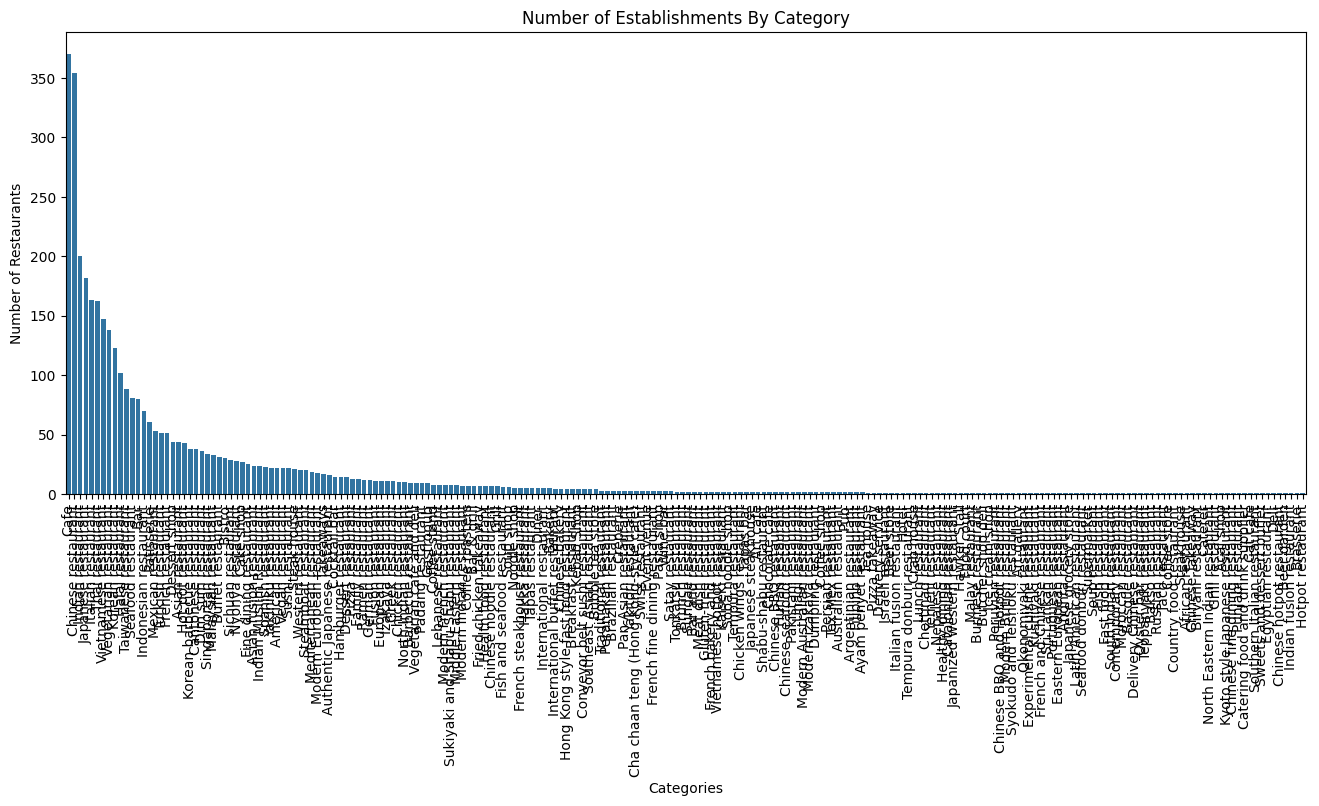

In [97]:
num_restaurants_by_categories = restaurants_set['main_category'].value_counts()
plt.figure(figsize=(16,6)) 
sns.countplot(data=restaurants_set, x='main_category', order=num_restaurants_by_categories.index)
plt.xticks(rotation=90)
plt.title('Number of Establishments By Category')
plt.xlabel('Categories')
plt.ylabel('Number of Restaurants')
plt.show()

# Now let's clean the Reviews Dataset

In [98]:
reviews.shape

(4148074, 16)

## Drop duplicates

In [99]:
reviews[reviews.duplicated(keep=False)]

,place_id,name,review_id,rating,review_text,published_at,published_at_date,review_likes_count,response_from_owner_text,response_from_owner_ago,response_from_owner_date,total_number_of_reviews_by_reviewer,total_number_of_photos_by_reviewer,is_local_guide,review_translated_text,response_from_owner_translated_text
836579,ChIJ-RfByosR2jERDz6NDnVW1IA,Huats Kee Fish Head Steamboat,ChdDSUhNMG9nS0VJQ0FnSURWbjRmMXZBRRAB,3,Having stemwd snapper fish head with black bea...,8 months ago,2023-12-29 18:27:00.933321,0,NaN,NaN,NaN,2.0,NaN,False,NaN,NaN
836580,ChIJ-RfByosR2jERDz6NDnVW1IA,Huats Kee Fish Head Steamboat,ChdDSUhNMG9nS0VJQ0FnSUNsa3AzX3pnRRAB,4,Good Zhi char esp tomato noodles and steam fis...,9 months ago,2023-11-29 18:27:00.938167,0,NaN,NaN,NaN,506.0,3801.0,True,NaN,NaN
836581,ChIJ-RfByosR2jERDz6NDnVW1IA,Huats Kee Fish Head Steamboat,ChdDSUhNMG9nS0VJQ0FnSUM1b2F1ZGpnRRAB,5,Very economical. Fish steamboat with about 11 ...,10 months ago,2023-10-29 18:27:00.942938,0,NaN,NaN,NaN,114.0,259.0,True,NaN,NaN
836582,ChIJ-RfByosR2jERDz6NDnVW1IA,Huats Kee Fish Head Steamboat,ChdDSUhNMG9nS0VJQ0FnSURaa1B5Mi13RRAB,1,Nothing special only their service attitude is...,11 months ago,2023-09-29 18:27:00.946329,0,NaN,NaN,NaN,166.0,67.0,True,NaN,NaN
836583,ChIJ-RfByosR2jERDz6NDnVW1IA,Huats Kee Fish Head Steamboat,ChZDSUhNMG9nS0VJQ0FnSUNaOThYTlRREAE,5,"Bill $100 for 5 adults, reasonae. Fish soup is...",11 months ago,2023-09-29 18:27:00.949322,0,NaN,NaN,NaN,84.0,42.0,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942836,ChIJ-RfByosR2jERDz6NDnVW1IA,Huats Kee Fish Head Steamboat,ChdDSUhNMG9nS0VJQ0FnSUMwN3NtRDdnRRAB,3,"The fish head steamnoat soup is delious, with ...",4 years ago,2020-08-29 18:27:04.061687,1,NaN,NaN,NaN,47.0,95.0,True,NaN,NaN
1942837,ChIJ-RfByosR2jERDz6NDnVW1IA,Huats Kee Fish Head Steamboat,ChZDSUhNMG9nS0VJQ0FnSUMwN3M3bEVBEAE,4,"Excellent char Kueh teow, yuan Yang horfun, on...",4 years ago,2020-08-29 18:27:04.487137,0,NaN,NaN,NaN,773.0,2217.0,True,NaN,NaN
1942838,ChIJ-RfByosR2jERDz6NDnVW1IA,Huats Kee Fish Head Steamboat,ChZDSUhNMG9nS0VJQ0FnSUMwN3ZhaEtBEAE,4,Great addition to Turf City. If you like Fish ...,4 years ago,2020-08-29 18:27:04.491038,0,NaN,NaN,NaN,283.0,1552.0,True,NaN,NaN
1942839,ChIJ-RfByosR2jERDz6NDnVW1IA,Huats Kee Fish Head Steamboat,ChZDSUhNMG9nS0VJQ0FnSUNVNy1UeWRBEAE,1,"Seriously if you want a good meal, don t try h...",5 years ago,2019-08-29 18:27:04.494468,0,NaN,NaN,NaN,12.0,11.0,False,NaN,NaN


In [100]:
reviews.drop_duplicates(inplace=True)

In [101]:
reviews.shape

(4148000, 16)

## Check NaN values and drop rows

In [102]:
reviews.isnull().sum()

place_id                                     0
name                                         0
review_id                                    0
rating                                       0
review_text                            1478245
                                        ...   
total_number_of_reviews_by_reviewer     180433
total_number_of_photos_by_reviewer     1305320
is_local_guide                          175956
review_translated_text                 3938819
response_from_owner_translated_text    4128855
Length: 16, dtype: int64

### Drop rows where review_text is NaN

In [103]:
reviews = reviews.dropna(subset=['review_text'])

In [104]:
reviews.shape

(2669755, 16)

In [105]:
reviews.isnull().sum()

place_id                                     0
name                                         0
review_id                                    0
rating                                       0
review_text                                  0
                                        ...   
total_number_of_reviews_by_reviewer       5623
total_number_of_photos_by_reviewer      711273
is_local_guide                            5617
review_translated_text                 2460577
response_from_owner_translated_text    2655052
Length: 16, dtype: int64

### Drop unnecessary columns

In [106]:
reviews = reviews.drop(columns=['review_translated_text', 'response_from_owner_translated_text'])

In [107]:
reviews = reviews.drop(columns=['response_from_owner_ago', 'response_from_owner_date'])

In [108]:
reviews = reviews.drop(columns=['published_at'])

In [109]:
reviews.shape

(2669755, 11)

### Change remaining NaN to empty string or zero

In [110]:
reviews.isnull().sum()

place_id                                     0
name                                         0
review_id                                    0
rating                                       0
review_text                                  0
                                        ...   
review_likes_count                           0
response_from_owner_text               2056564
total_number_of_reviews_by_reviewer       5623
total_number_of_photos_by_reviewer      711273
is_local_guide                            5617
Length: 11, dtype: int64

In [111]:
reviews.sample(10)

,place_id,name,review_id,rating,review_text,published_at_date,review_likes_count,response_from_owner_text,total_number_of_reviews_by_reviewer,total_number_of_photos_by_reviewer,is_local_guide
3872868,ChIJl67Rr1wa2jERh76IxLI5V3A,Min Jiang at Dempsey,ChZDSUhNMG9nS0VJQ0FnSUN4eTlya2FnEAE,5,Beautiful presentation of the dim sum. The dim...,2023-09-30 21:59:52.661352,1,NaN,87.0,518.0,False
3154486,ChIJOSH5G30ddkgR9pvx5His1FU,Vue Cinema London - Westfield Stratford,ChZDSUhNMG9nS0VJQ0FnSURZcXRIV1JBEAE,3,The fact that its in Westfield i expected more...,2019-08-31 06:13:38.627456,0,NaN,64.0,48.0,True
1056345,ChIJabmPfqQi2jERMeyNJVN9Uss,Fu Lin Tofu Yuen - Siglap,ChZDSUhNMG9nS0VJQ0FnSUN5aFlQbk1nEAE,5,Delicious YTF at an affordable price.,2021-08-29 17:00:13.998361,0,Thank you for your compliments!,311.0,7715.0,True
2180875,ChIJ_Ra3T7cZ2jERgCa1qfhX6as,Mama Diam 妈妈店: Hidden restaurant and cocktail ...,ChdDSUhNMG9nS0VJQ0FnSUN4NVBIdmxnRRAB,4,This Mama Diam you are reading here is kind of...,2023-08-30 03:39:48.249407,0,NaN,141.0,455.0,True
3816652,ChIJMRktKKYZ2jERJfOgwrMKUeg,Yechun Xiao Jiang Nan Restaurant Group Pte.Ltd...,ChZDSUhNMG9nS0VJQ0FnSUM0d2UydUhnEAE,1,The dried green beans have totally perfect smo...,2019-08-31 08:50:31.165149,0,NaN,2.0,NaN,False
2656685,ChIJ3c_fVXMZ2jEReJ8cjTTd_eE,Spring Court Chinese Restaurant Singapore,ChZDSUhNMG9nS0VJQ0FnSURTeHVMelVREAE,5,Traditional Cantonese cuisine in Chinatown. S...,2021-08-31 00:33:48.964262,0,NaN,409.0,2921.0,True
784407,ChIJiYxb_K8Z2jERtIq8MYwwCKA,Joo Bar,ChZDSUhNMG9nS0VJQ0FnSUM0b1BxbFRnEAE,4,Food is delicious but the cleanliness would ne...,2019-08-29 13:23:40.322424,0,NaN,172.0,285.0,True
2695655,ChIJ7QKFq0kX2jERdP32ftdT0_A,So Good Char Chan Tang,ChZDSUhNMG9nS0VJQ0FnSUR4NHAzMUF3EAE,5,Good,2023-08-30 22:42:07.833015,0,NaN,60.0,29.0,True
1593973,ChIJT3fdLZwZ2jERJx-QGgPAoac,Common Man Coffee Roasters - Martin Road,ChdDSUhNMG9nS0VJQ0FnSUNDNG9TeTd3RRAB,5,Nice ambiance with good food and coffee.. Grea...,2020-08-30 11:58:26.572511,0,NaN,345.0,2372.0,True
1414380,ChIJA5LATO4Z2jER111V-v6abAI,Marina Bay Sands Singapore,ChdDSUhNMG9nS0VJQ0FnSUMwaWRXWm1BRRAB,4,"Looks clean, beautiful and nice to walk on.",2020-08-30 04:35:28.497373,1,NaN,266.0,348.0,True


In [112]:
reviews['is_local_guide'] = reviews['is_local_guide'].fillna(False)  

In [113]:
reviews[['total_number_of_photos_by_reviewer', 'total_number_of_reviews_by_reviewer']] = reviews[['total_number_of_photos_by_reviewer', 'total_number_of_reviews_by_reviewer']].fillna(0)  

In [114]:
reviews['response_from_owner_text'] = reviews['response_from_owner_text'].fillna("")  

In [115]:
reviews.isnull().sum()

place_id                               0
name                                   0
review_id                              0
rating                                 0
review_text                            0
                                      ..
review_likes_count                     0
response_from_owner_text               0
total_number_of_reviews_by_reviewer    0
total_number_of_photos_by_reviewer     0
is_local_guide                         0
Length: 11, dtype: int64

In [116]:
reviews.sample(10)

,place_id,name,review_id,rating,review_text,published_at_date,review_likes_count,response_from_owner_text,total_number_of_reviews_by_reviewer,total_number_of_photos_by_reviewer,is_local_guide
1881124,ChIJryYA1N4Z2jER3sXuBWrPwgA,Paradise Dynasty,ChdDSUhNMG9nS0VJQ0FnSUNxNXBlRHp3RRAB,1,Thought my earlier order through online platfo...,2021-08-30 09:36:38.652453,0,,86.0,432.0,True
1407613,ChIJA5LATO4Z2jER111V-v6abAI,Marina Bay Sands Singapore,ChZDSUhNMG9nS0VJQ0FnSURDMWJUTkN3EAE,5,Nice place,2021-08-30 04:30:26.869385,0,,10.0,6.0,False
1526772,ChIJ8SAnnm8X2jERKkCfGMlx3jw,Munchi Pancakes,ChZDSUhNMG9nS0VJQ0FnSUNGdTZHLWZnEAE,4,Newly Open at Rivervale plaza. Value buy.,2024-01-30 05:49:05.072939,0,,373.0,111.0,True
1442453,ChIJfy6rFU0Z2jERh1yf7W5Msz0,FellasCube,ChZDSUhNMG9nS0VJQ0FnSURKcU92a0tREAE,4,Great thick coffee with smoky after-taste and ...,2023-08-30 00:29:51.778723,1,,65.0,110.0,True
2244233,ChIJHfUPa50Z2jERGJvm5OXf788,Olivia Restaurant & Lounge,ChdDSUhNMG9nS0VJQ0FnSUM3ck9QUnlnRRAB,4,It is a famous brand in Singapore. Check-in lo...,2024-08-16 07:44:11.507803,0,,11.0,53.0,True
1455827,ChIJ84FCX6gZ2jER3WZT4yKVWUE,PUTIEN Marina Square,ChdDSUhNMG9nS0VJQ0FnSURRdnItQTN3RRAB,5,Very nice food,2018-08-30 09:19:32.497646,1,,106.0,182.0,True
536890,ChIJl_sOMpIZ2jERa4tZiOdKqvc,SUSHI TEI,ChZDSUhNMG9nS0VJQ0FnSUNBMGVfT1RBEAE,4,Food: 4/5 Ambience: 5/5 Service: 4/5 Value for...,2017-08-29 00:49:31.132100,0,,51.0,67.0,True
2964993,ChIJOfoLHMwZ2jER3FqSlvDswnk,Smile Martabak - Funan,ChdDSUhNMG9nS0VJQ0FnSUQyZzdYYzhRRRAB,2,Food is okay but seems to be understaffed lead...,2022-08-30 22:39:07.625243,0,Hi! Glad to know that you like our food! Sorry...,1.0,0.0,False
1806467,ChIJbUjtT6cZ2jERJOB8kHFKljI,Odette,ChdDSUhNMG9nS0VJQ0FnSUNKMnBuZ3N3RRAB,5,If you want to try French food with a good atm...,2023-08-30 07:38:47.577296,1,,17.0,1.0,True
82634,ChIJpeavFI0Z2jEReoYE7RTQ8m0,8 Korean BBQ (Shaw Centre) | Korean Bbq Restau...,ChdDSUhNMG9nS0VJQ0FnSUQ1X3FEOXF3RRAB,5,Vanessa was the person who served us (2 adults...,2023-10-28 17:49:24.700100,0,,3.0,2.0,False


## Establish the Consideration Set

### Only keep those with reviews published_at date from 1 Jan 2023

In [117]:
type(list(reviews['published_at_date'])[0])

str

In [118]:
# Convert the 'published_at_date' column to datetime and simplify to just date
reviews['published_at_date'] = pd.to_datetime(reviews['published_at_date'])
reviews['published_at_date'] = reviews['published_at_date'].dt.date
print(reviews['published_at_date'])

0          2024-08-15
1          2024-08-08
2          2024-08-08
3          2024-07-29
4          2024-06-29
              ...    
4148069    2016-08-30
4148070    2016-08-30
4148071    2016-08-30
4148072    2016-08-30
4148073    2014-08-30
Name: published_at_date, Length: 2669755, dtype: object


In [119]:
cut_off_date = datetime.strptime("2023-01-01", '%Y-%m-%d').date()

In [120]:
reviews

,place_id,name,review_id,rating,review_text,published_at_date,review_likes_count,response_from_owner_text,total_number_of_reviews_by_reviewer,total_number_of_photos_by_reviewer,is_local_guide
0,ChIJe3o1EBQZ2jERzAmaXpqhpAM,Bangkok Thai Food,ChdDSUhNMG9nS0VJQ0FnSUM3bE9DZ2lRRRAB,5,Delicious delicious delicious! Had the Tom yum...,2024-08-15,0,,453.0,1210.0,True
1,ChIJe3o1EBQZ2jERzAmaXpqhpAM,Bangkok Thai Food,ChZDSUhNMG9nS0VJQ0FnSURicHQyb2Z3EAE,4,Fairly authentic Pad Thai cooked by a Thai per...,2024-08-08,0,,1381.0,8425.0,True
2,ChIJe3o1EBQZ2jERzAmaXpqhpAM,Bangkok Thai Food,ChdDSUhNMG9nS0VJQ0FnSURieXYtTGdnRRAB,5,I had the fried kway tiao which cost $6. If ha...,2024-08-08,0,,615.0,2361.0,True
3,ChIJe3o1EBQZ2jERzAmaXpqhpAM,Bangkok Thai Food,ChdDSUhNMG9nS0VJQ0FnSUNiOFlhSzl3RRAB,3,I got the prawn omelette rice here for $6. The...,2024-07-29,0,,29.0,40.0,False
4,ChIJe3o1EBQZ2jERzAmaXpqhpAM,Bangkok Thai Food,ChZDSUhNMG9nS0VJQ0FnSUN6NnJhZEp3EAE,5,Really tasty Thai place in chinatown! The gree...,2024-06-29,0,,38.0,12.0,False
...,...,...,...,...,...,...,...,...,...,...,...
4148069,ChIJ5TMoXCMY2jERzpazbjQOs6M,Rice House Vegetarian,ChdDSUhNMG9nS0VJQ0FnSUNRZ0plZ2l3RRAB,4,Vegetarian eatery with good range of dishes th...,2016-08-30,0,,100.0,189.0,True
4148070,ChIJ5TMoXCMY2jERzpazbjQOs6M,Rice House Vegetarian,ChdDSUhNMG9nS0VJQ0FnSURBc2VmdGt3RRAB,4,Very nice vegetarian porridge and side dishes,2016-08-30,0,,344.0,1137.0,True
4148071,ChIJ5TMoXCMY2jERzpazbjQOs6M,Rice House Vegetarian,ChdDSUhNMG9nS0VJQ0FnSUNRLXN5MG1BRRAB,1,expensive and not nice!,2016-08-30,2,,14.0,0.0,False
4148072,ChIJ5TMoXCMY2jERzpazbjQOs6M,Rice House Vegetarian,ChZDSUhNMG9nS0VJQ0FnSURnM3FMWWN3EAE,5,Cheap and delicious,2016-08-30,0,,29.0,48.0,True


In [121]:
reviews[reviews['published_at_date'] >= cut_off_date]

,place_id,name,review_id,rating,review_text,published_at_date,review_likes_count,response_from_owner_text,total_number_of_reviews_by_reviewer,total_number_of_photos_by_reviewer,is_local_guide
0,ChIJe3o1EBQZ2jERzAmaXpqhpAM,Bangkok Thai Food,ChdDSUhNMG9nS0VJQ0FnSUM3bE9DZ2lRRRAB,5,Delicious delicious delicious! Had the Tom yum...,2024-08-15,0,,453.0,1210.0,True
1,ChIJe3o1EBQZ2jERzAmaXpqhpAM,Bangkok Thai Food,ChZDSUhNMG9nS0VJQ0FnSURicHQyb2Z3EAE,4,Fairly authentic Pad Thai cooked by a Thai per...,2024-08-08,0,,1381.0,8425.0,True
2,ChIJe3o1EBQZ2jERzAmaXpqhpAM,Bangkok Thai Food,ChdDSUhNMG9nS0VJQ0FnSURieXYtTGdnRRAB,5,I had the fried kway tiao which cost $6. If ha...,2024-08-08,0,,615.0,2361.0,True
3,ChIJe3o1EBQZ2jERzAmaXpqhpAM,Bangkok Thai Food,ChdDSUhNMG9nS0VJQ0FnSUNiOFlhSzl3RRAB,3,I got the prawn omelette rice here for $6. The...,2024-07-29,0,,29.0,40.0,False
4,ChIJe3o1EBQZ2jERzAmaXpqhpAM,Bangkok Thai Food,ChZDSUhNMG9nS0VJQ0FnSUN6NnJhZEp3EAE,5,Really tasty Thai place in chinatown! The gree...,2024-06-29,0,,38.0,12.0,False
...,...,...,...,...,...,...,...,...,...,...,...
4147821,ChIJ5TMoXCMY2jERzpazbjQOs6M,Rice House Vegetarian,ChdDSUhNMG9nS0VJQ0FnSUMtNUx6NWdBRRAB,4,Parking: Food,2023-08-30,0,,5.0,33.0,True
4147822,ChIJ5TMoXCMY2jERzpazbjQOs6M,Rice House Vegetarian,ChdDSUhNMG9nS0VJQ0FnSURlcGREYzFRRRAB,5,A richly flavored collection of classic Singap...,2023-08-30,2,,588.0,5441.0,True
4147823,ChIJ5TMoXCMY2jERzpazbjQOs6M,Rice House Vegetarian,ChZDSUhNMG9nS0VJQ0FnSURlaXJ5M2R3EAE,4,Vegetarian options: The noddles and the Thai s...,2023-08-30,0,,14.0,0.0,True
4147824,ChIJ5TMoXCMY2jERzpazbjQOs6M,Rice House Vegetarian,ChdDSUhNMG9nS0VJQ0FnSUNlNjdmaXh3RRAB,5,"As a vegetarian who loves Chinese street food,...",2023-08-30,2,,31.0,7.0,False


In [122]:
reviews_set = reviews[reviews['published_at_date'] >= cut_off_date].copy()

In [123]:
reviews_set.shape

(1348619, 11)

## Merge Reviews and Restaurants Dataset

In [124]:
restaurants_set_to_merge = restaurants_set.drop(columns=['address', 'main_rating', 'reviews', 'link', 'review_photos'])

In [125]:
restaurants_set_to_merge.shape

(3787, 4)

In [126]:
reviews_set_to_merge = reviews_set.drop(columns=['name'])

In [127]:
# inner merge
restaurants_and_reviews = restaurants_set_to_merge.merge(reviews_set_to_merge, how='inner', on='place_id')

In [128]:
restaurants_and_reviews.shape

(1586312, 13)

In [129]:
restaurants_and_reviews.sample(10)

,place_id,name,main_category,categories,review_id,rating,review_text,published_at_date,review_likes_count,response_from_owner_text,total_number_of_reviews_by_reviewer,total_number_of_photos_by_reviewer,is_local_guide
1489725,ChIJ9_SgF7EZ2jERPvKe8C4ZA1Q,Cicheti,Pizza restaurant,"[Pizza restaurant, Italian restaurant, Pasta s...",ChZDSUhNMG9nS0VJQ0FnSUNlaVlxeWV3EAE,5,I didnt make reservation but they let me eat b...,2023-08-29,0,,526.0,117.0,True
344282,ChIJCT3xvhoZ2jERF_g-hcvpdis,Maxi Coffee Bar,Cafe,[Cafe],ChZDSUhNMG9nS0VJQ0FnSUR4cXVIekl3EAE,4,"Decent coffee, decent food. Staff is well mann...",2023-08-30,0,,146.0,356.0,True
896300,ChIJRRLgTr4Z2jERbRQldDfL6_A,Ăn Là Ghiền-Authentic Vietnamese Cuisine,Vietnamese restaurant,"[Vietnamese restaurant, Asian restaurant, Gril...",ChZDSUhNMG9nS0VJQ0FnSUNiaExlNFJBEAE,5,"Enjoyed the grilled pork with rice noodles, pl...",2024-07-30,0,,8.0,7.0,False
1057605,ChIJ0VKcv7wZ2jERJm06EQI3Sz0,uptown.,Cafe,"[Cafe, Bar, Brunch restaurant, Coffee shop, Lo...",ChZDSUhNMG9nS0VJQ0FnSURGcDV2cWRnEAE,5,"Love their uptown Americano, super refreshing ...",2023-11-30,0,,6.0,3.0,False
75991,ChIJcR64THcZ2jERa4q7Ns8yOOk,Sin Hoi Sai Seafood Restaurant,Seafood restaurant,"[Seafood restaurant, Restaurant]",ChdDSUhNMG9nS0VJQ0FnSURwcUsyTm1RRRAB,1,Pay attention to the price! I had specifically...,2023-08-30,1,,4.0,0.0,False
876173,ChIJLcO5LskZ2jERaBnzFhIX_OE,Làng Nướng Việt Nam - Authentic Vietnamese Cui...,Vietnamese restaurant,"[Vietnamese restaurant, Barbecue restaurant, H...",ChdDSUhNMG9nS0VJQ0FnSUNMc3RqQzBBRRAB,5,Food was amazing,2024-06-30,0,,5.0,1.0,False
263303,ChIJo3EXjvAZ2jERRdFfHa-rqT8,Cappadocia Turkish & Mediterranean Restaurant,Turkish restaurant,"[Turkish restaurant, Halal restaurant, Mediter...",ChZDSUhNMG9nS0VJQ0FnSURaLV9PcEhBEAE,5,Celebrated my dad s birthday and they came up ...,2023-10-28,0,"aaron hakim, thank you for recommending us to ...",11.0,0.0,False
669023,ChIJL7m1cy8Z2jERHtaorNYRzuQ,Ayasofya Turkish Restaurant,Turkish restaurant,"[Turkish restaurant, Restaurant]",ChdDSUhNMG9nS0VJQ0FnSURCMTY3dl9BRRAB,5,This is the best Turkish restaurant in Singapo...,2024-06-30,0,,158.0,415.0,True
1148469,ChIJs1MGe_cR2jER1Sv0Au-wtmQ,Captain Kim Korean BBQ & Hotpot Buffet,Buffet restaurant,[Buffet restaurant],ChZDSUhNMG9nS0VJQ0FnSURELXFyMU1BEAE,5,"The food choices, the service by all of the st...",2024-04-29,0,,4.0,2.0,False
1423686,ChIJux02Kg0Z2jERAajtnmsY92k,BBQ Box (Chinatown),Chinese restaurant,"[Chinese restaurant, Beer store, Seafood resta...",ChdDSUhNMG9nS0VJQ0FnSUNibk9uWmhRRRAB,5,yummy and solid skewers. Dietary restrictions:...,2024-07-28,0,,2.0,1.0,False


### Pre-Processing

### Use label encoding for main_category

In [130]:
label_encoder = LabelEncoder()

In [131]:
restaurants_and_reviews['main_category_encoded'] = label_encoder.fit_transform(restaurants_and_reviews['main_category'])

In [132]:
restaurants_and_reviews.review_text[230]

'The New Year decoration is very beautiful and the atmosphere is great. I will go there again to check in. The food is also very good and the service is very good'

### Embed the review_text

#### Text preprocessing

In [133]:
# Convert to lowercase
restaurants_and_reviews['review_text'] = restaurants_and_reviews['review_text'].str.lower()

In [134]:
# Remove numbers
text = "i do not recommend this restaurant, we waited for so long, like 30 minutes, this is ridiculous"
''.join(char for char in text if not char.isdigit())

'i do not recommend this restaurant, we waited for so long, like  minutes, this is ridiculous'

In [135]:
restaurants_and_reviews['review_text'] = restaurants_and_reviews['review_text'].apply(lambda x: ''.join(char for char in x if not char.isdigit()))

In [136]:
restaurants_and_reviews['review_text'][restaurants_and_reviews['review_text'].str.contains('minutes')]

28         i visited singapore with high expectations of ...
133        disappointing experience dining here on a publ...
156        i waited  minutes for my $++ fish and $++ beef...
246        extremely poor service from the wait staff. or...
307        if you order a course, everything will be on y...
                                 ...                        
1585673    it seems like our visit coincided with the nat...
1585748    the food is okay. super disappointed by the di...
1586134    i m not one to give google reviews, but my rec...
1586181    booked with  klook crab vouchers, and called i...
1586221    a very poor restaurant, the food is undercooke...
Name: review_text, Length: 11795, dtype: object

In [137]:
# Remove punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

restaurants_and_reviews['review_text'] = restaurants_and_reviews['review_text'].apply(remove_punctuation)

In [138]:
restaurants_and_reviews['review_text'][1586221]

'a very poor restaurant the food is undercooked and it took  minutes to get the same dish out'

In [139]:
# Strip trailing spaces
restaurants_and_reviews['review_text'] = restaurants_and_reviews['review_text'].str.strip()

#### Tokenization

In [145]:
# Tokenize
restaurants_and_reviews['review_text_tokens'] = restaurants_and_reviews['review_text'].apply(lambda x: word_tokenize(x))

In [146]:
restaurants_and_reviews['review_text_tokens']

0                                            [food, is, wow]
1          [i, always, stay, at, the, grand, copthorne, w...
2          [my, family, and, i, had, a, gathering, at, re...
3          [celebrated, my, mil, th, birthday, and, preco...
4          [had, a, wonderful, dinner, here, tonight, the...
                                 ...                        
1586307    [having, early, cny, dinner, with, parents, di...
1586308    [among, the, zhichar, restaurants, so, far, th...
1586309                         [nice, and, delicious, food]
1586310    [apr, having, late, dinner, here, my, wife, or...
1586311                        [authentic, and, tasty, food]
Name: review_text_tokens, Length: 1586312, dtype: object

In [148]:
# Remove stop words
stop_words = set(stopwords.words('english'))
restaurants_and_reviews['review_text_tokens'] = restaurants_and_reviews['review_text_tokens'].apply(lambda x: [w for w in x if not w in stop_words]) 

In [149]:
restaurants_and_reviews['review_text_tokens']

0                                                [food, wow]
1          [always, stay, grand, copthorne, waterfront, h...
2          [family, gathering, red, house, seafood, absol...
3          [celebrated, mil, th, birthday, precoordinated...
4          [wonderful, dinner, tonight, highlight, crabs,...
                                 ...                        
1586307    [early, cny, dinner, parents, dishes, tasty, w...
1586308    [among, zhichar, restaurants, far, best, bt, b...
1586309                              [nice, delicious, food]
1586310    [apr, late, dinner, wife, ordered, white, mee,...
1586311                             [authentic, tasty, food]
Name: review_text_tokens, Length: 1586312, dtype: object

In [150]:
# Lemmatize
lemmatizer = WordNetLemmatizer()

In [155]:
sentence = ['wow', 'love', 'this', 'wonderful', 'great', 'food', 'loving', 'eating']

In [157]:
restaurants_and_reviews['review_text_tokens'] = restaurants_and_reviews['review_text_tokens'].apply(lambda x: [lemmatizer.lemmatize(word, pos = "v") for word in x]) 

In [158]:
restaurants_and_reviews['review_text_tokens']

0                                                [food, wow]
1          [always, stay, grand, copthorne, waterfront, h...
2          [family, gather, red, house, seafood, absolute...
3          [celebrate, mil, th, birthday, precoordinated,...
4          [wonderful, dinner, tonight, highlight, crab, ...
                                 ...                        
1586307    [early, cny, dinner, parent, dish, tasty, wort...
1586308    [among, zhichar, restaurants, far, best, bt, b...
1586309                              [nice, delicious, food]
1586310    [apr, late, dinner, wife, order, white, mee, h...
1586311                             [authentic, tasty, food]
Name: review_text_tokens, Length: 1586312, dtype: object